In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Préparation:

In [256]:
df=pd.read_csv("meteo_10ans.csv")

In [257]:
df.columns

Index(['Date', 'Temperature moyenne (°C)', 'Precipitation (mm)',
       'Humidite moyenne (%)'],
      dtype='object')

In [258]:
df=df.rename(columns={
    'Date': 'date',
    "Temperature moyenne (°C)": "temperature",
    "Precipitation (mm)": "precipitation",
    "Humidite moyenne (%)":"humidite"
    })

In [259]:
df

,date,temperature,precipitation,humidite
0,2014-12-01,13.700082,0.200000,90.432320
1,2014-12-02,14.166749,1.700000,86.306145
2,2014-12-03,12.760501,7.699999,92.439800
3,2014-12-04,11.952167,9.800000,86.916690
4,2014-12-05,11.660497,0.500000,82.778650
...,...,...,...,...
3649,2024-11-27,18.568415,0.000000,62.709230
3650,2024-11-28,20.247583,0.000000,47.782467
3651,2024-11-29,18.974665,0.000000,56.024593
3652,2024-11-30,20.368416,0.000000,45.243610


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3654 non-null   object 
 1   temperature    3654 non-null   float64
 2   precipitation  3654 non-null   float64
 3   humidite       3654 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [261]:
df['date'] = pd.to_datetime(df['date'])
df['jour'] = df['date'].dt.day
df['mois'] = df['date'].dt.month

In [262]:
df

,date,temperature,precipitation,humidite,jour,mois
0,2014-12-01,13.700082,0.200000,90.432320,1,12
1,2014-12-02,14.166749,1.700000,86.306145,2,12
2,2014-12-03,12.760501,7.699999,92.439800,3,12
3,2014-12-04,11.952167,9.800000,86.916690,4,12
4,2014-12-05,11.660497,0.500000,82.778650,5,12
...,...,...,...,...,...,...
3649,2024-11-27,18.568415,0.000000,62.709230,27,11
3650,2024-11-28,20.247583,0.000000,47.782467,28,11
3651,2024-11-29,18.974665,0.000000,56.024593,29,11
3652,2024-11-30,20.368416,0.000000,45.243610,30,11


In [263]:
#pour chaque ligne onajoute 
df['temp_moyenne_mobile'] = df['temperature'].rolling(window=30).mean()
df['hum_moyenne_mobile'] = df['humidite'].rolling(window=30).mean()

In [264]:
df.iloc[100:130]

,date,temperature,precipitation,humidite,jour,mois,temp_moyenne_mobile,hum_moyenne_mobile
100,2015-03-11,15.512582,0.000000,72.569020,11,3,12.204527,80.660712
101,2015-03-12,13.641747,0.000000,80.043500,12,3,12.312583,80.497858
102,2015-03-13,12.858417,0.000000,76.152360,13,3,12.415361,80.050200
103,2015-03-14,12.500083,0.000000,81.115074,14,3,12.492166,79.736373
104,2015-03-15,12.335499,0.000000,75.772550,15,3,12.566263,79.416526
105,2015-03-16,12.835499,0.000000,74.663840,16,3,12.664041,79.175846
106,2015-03-17,11.029248,1.500000,80.334470,17,3,12.666819,78.975679
107,2015-03-18,10.983417,7.199999,80.747640,18,3,12.652444,78.854604
108,2015-03-19,10.954249,2.500000,79.349500,19,3,12.719041,78.657716
109,2015-03-20,11.310501,0.700000,75.904854,20,3,12.806263,78.484462


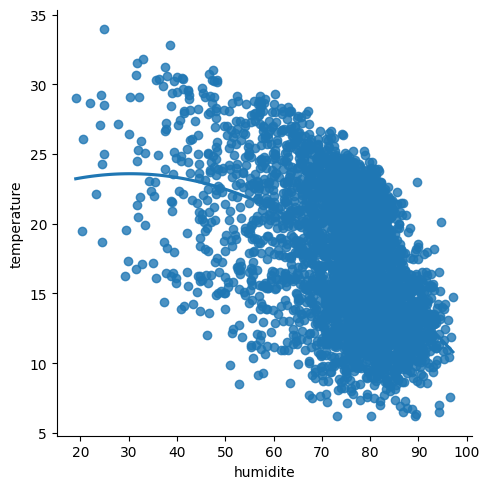

In [265]:
sns.lmplot(x ="humidite", y ="temperature", data = df, order = 2, ci = None) 
plt.show()

In [266]:
df=df.dropna()
df

,date,temperature,precipitation,humidite,jour,mois,temp_moyenne_mobile,hum_moyenne_mobile
29,2014-12-30,9.808417,0.0,72.482480,30,12,11.307097,85.327589
30,2014-12-31,10.266750,0.0,75.268300,31,12,11.192652,84.822122
31,2015-01-01,9.777165,0.0,76.918420,1,1,11.046333,84.509198
32,2015-01-02,9.427167,0.0,76.641630,2,1,10.935222,83.982592
33,2015-01-03,9.893834,0.0,76.573280,3,1,10.866611,83.637812
...,...,...,...,...,...,...,...,...
3649,2024-11-27,18.568415,0.0,62.709230,27,11,17.635153,75.397754
3650,2024-11-28,20.247583,0.0,47.782467,28,11,17.869041,74.136122
3651,2024-11-29,18.974665,0.0,56.024593,29,11,17.968486,73.016043
3652,2024-11-30,20.368416,0.0,45.243610,30,11,18.056194,71.832037


# Normalisation:

In [267]:
stand_scaler=StandardScaler()
df_scaled=stand_scaler.fit_transform(df[['precipitation', 'humidite', 'temp_moyenne_mobile', 'hum_moyenne_mobile']])

In [268]:
df_scaled

array([[-0.31371173, -0.16157341, -1.44532116,  1.78303834],
       [-0.31371173,  0.07480183, -1.4715504 ,  1.70002398],
       [-0.31371173,  0.21481357, -1.50508501,  1.64863154],
       ...,
       [-0.31371173, -1.55801573,  0.08138691, -0.23892249],
       [-0.31371173, -2.47277599,  0.10148857, -0.43337527],
       [-0.31371173, -1.65704986,  0.11398249, -0.62271155]])

In [269]:
df_scaled= pd.DataFrame(df_scaled,columns=['precipitation', 'humidite', 'temp_moyenne_mobile', 'hum_moyenne_mobile'],index=df.index)

In [270]:
df_scaled

,precipitation,humidite,temp_moyenne_mobile,hum_moyenne_mobile
29,-0.313712,-0.161573,-1.445321,1.783038
30,-0.313712,0.074802,-1.471550,1.700024
31,-0.313712,0.214814,-1.505085,1.648632
32,-0.313712,0.191328,-1.530550,1.562146
33,-0.313712,0.185529,-1.546275,1.505521
...,...,...,...,...
3649,-0.313712,-0.990828,0.004991,0.152233
3650,-0.313712,-2.257355,0.058595,-0.054969
3651,-0.313712,-1.558016,0.081387,-0.238922
3652,-0.313712,-2.472776,0.101489,-0.433375


In [271]:
df_scaled = pd.concat([df[['date','temperature','jour','mois']].reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)

In [272]:
df_scaled

,date,temperature,jour,mois,precipitation,humidite,temp_moyenne_mobile,hum_moyenne_mobile
0,2014-12-30,9.808417,30,12,-0.313712,-0.161573,-1.445321,1.783038
1,2014-12-31,10.266750,31,12,-0.313712,0.074802,-1.471550,1.700024
2,2015-01-01,9.777165,1,1,-0.313712,0.214814,-1.505085,1.648632
3,2015-01-02,9.427167,2,1,-0.313712,0.191328,-1.530550,1.562146
4,2015-01-03,9.893834,3,1,-0.313712,0.185529,-1.546275,1.505521
...,...,...,...,...,...,...,...,...
3620,2024-11-27,18.568415,27,11,-0.313712,-0.990828,0.004991,0.152233
3621,2024-11-28,20.247583,28,11,-0.313712,-2.257355,0.058595,-0.054969
3622,2024-11-29,18.974665,29,11,-0.313712,-1.558016,0.081387,-0.238922
3623,2024-11-30,20.368416,30,11,-0.313712,-2.472776,0.101489,-0.433375


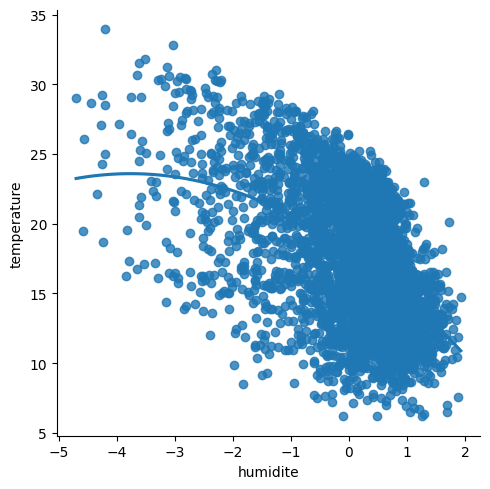

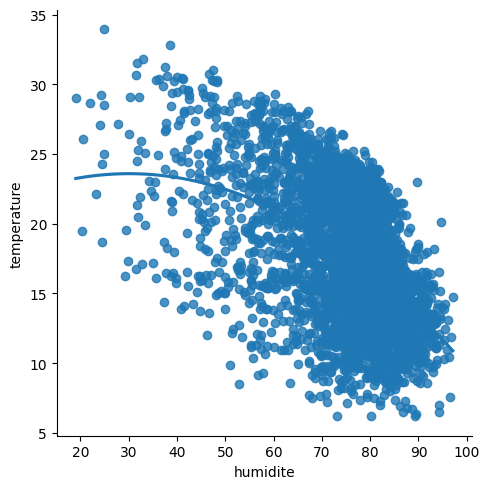

In [274]:
sns.lmplot(x ="humidite", y ="temperature", data = df_scaled, order = 2, ci = None)
sns.lmplot(x ="humidite", y ="temperature", data = df, order = 2, ci = None) 
plt.show()

In [275]:
correlation_matrix1 = df_scaled.corr()
correlation_matrix1

,date,temperature,jour,mois,precipitation,humidite,temp_moyenne_mobile,hum_moyenne_mobile
date,1.000000,0.061735,0.006776,0.076995,0.008866,0.070412,0.078544,0.132217
temperature,0.061735,1.000000,0.007515,0.336109,-0.252128,-0.496259,0.851324,-0.496172
jour,0.006776,0.007515,1.000000,0.010711,0.024407,-0.034780,0.013535,-0.009435
mois,0.076995,0.336109,0.010711,1.000000,-0.071474,-0.072273,0.517370,-0.202153
precipitation,0.008866,-0.252128,0.024407,-0.071474,1.000000,0.281029,-0.180838,0.103646
humidite,0.070412,-0.496259,-0.034780,-0.072273,0.281029,1.000000,-0.259113,0.419178
temp_moyenne_mobile,0.078544,0.851324,0.013535,0.517370,-0.180838,-0.259113,1.000000,-0.580603
hum_moyenne_mobile,0.132217,-0.496172,-0.009435,-0.202153,0.103646,0.419178,-0.580603,1.000000


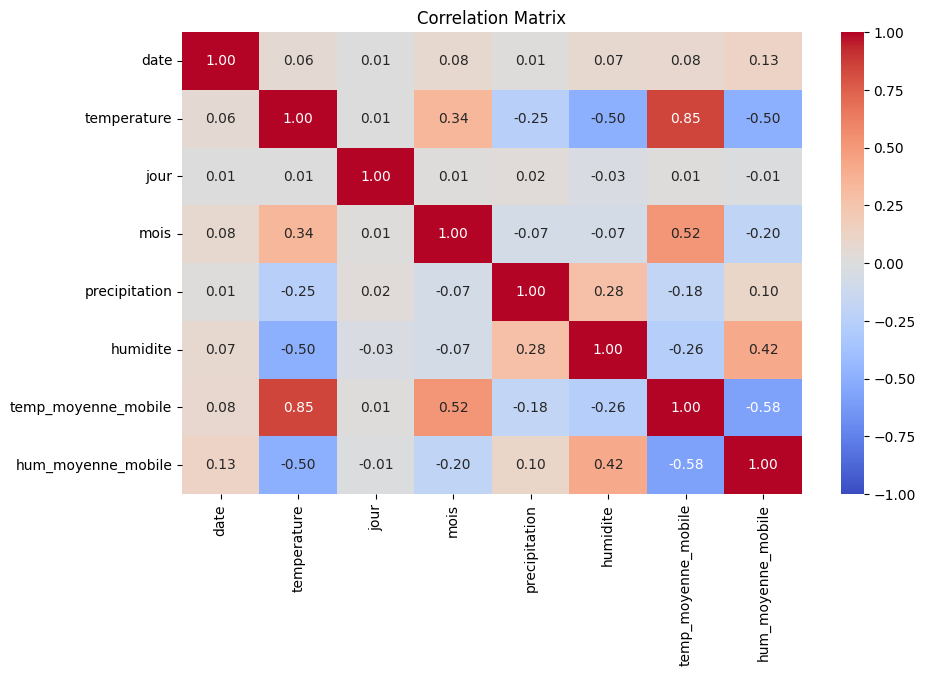

In [276]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Modélisation:

### Regression lineaire

In [277]:
x = df_scaled.drop(['temperature','date'],axis=1,inplace=False)
y = df_scaled['temperature'].copy()
x

,jour,mois,precipitation,humidite,temp_moyenne_mobile,hum_moyenne_mobile
0,30,12,-0.313712,-0.161573,-1.445321,1.783038
1,31,12,-0.313712,0.074802,-1.471550,1.700024
2,1,1,-0.313712,0.214814,-1.505085,1.648632
3,2,1,-0.313712,0.191328,-1.530550,1.562146
4,3,1,-0.313712,0.185529,-1.546275,1.505521
...,...,...,...,...,...,...
3620,27,11,-0.313712,-0.990828,0.004991,0.152233
3621,28,11,-0.313712,-2.257355,0.058595,-0.054969
3622,29,11,-0.313712,-1.558016,0.081387,-0.238922
3623,30,11,-0.313712,-2.472776,0.101489,-0.433375


In [278]:
y

0        9.808417
1       10.266750
2        9.777165
3        9.427167
4        9.893834
          ...    
3620    18.568415
3621    20.247583
3622    18.974665
3623    20.368416
3624    17.912167
Name: temperature, Length: 3625, dtype: float64

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [280]:
x_train.columns

Index(['jour', 'mois', 'precipitation', 'humidite', 'temp_moyenne_mobile',
       'hum_moyenne_mobile'],
      dtype='object')

In [281]:
regr = LinearRegression() 
regr.fit(x_train, y_train)

LinearRegression()

In [282]:
y_pred = regr.predict(x_test) 

In [283]:
y_pred

array([25.89301971, 12.15189162, 23.88186803, 19.91024202, 19.71288904,
       20.53918207, 22.30044125, 12.48871823,  9.63141671, 17.06388236,
       16.72295139, 11.80426215, 21.71690478, 10.75161873, 13.61871121,
       14.93828964, 11.61075046, 22.76095879,  9.03164138, 20.33725338,
       12.45033923, 23.40872638, 21.46967272, 17.27955107, 19.37665008,
       24.88177689, 23.26361432, 21.79449761, 15.41871868, 18.06970827,
       12.94861404, 24.39460894, 21.48940064, 20.61936233, 17.34497823,
       20.49173452, 16.93007077, 10.88806613, 17.81718601, 11.38650365,
       19.09428041, 19.54384782, 13.06359354, 14.18759419, 12.55301595,
       12.15184808, 10.7613505 , 13.87744411, 16.4309061 , 18.29632534,
       14.89067515, 12.18229219, 21.05598005, 19.45778678, 22.30107921,
       22.7938877 , 13.10330979, 17.90832036, 19.29176407, 26.61505238,
       11.35622588, 27.35211831, 15.38257055, 18.41919431, 12.97595684,
       15.19040138, 22.35702607, 18.18688236, 17.05567788, 15.83

In [304]:
y_test.shape

(725,)

In [305]:
y_pred.shape

(725,)

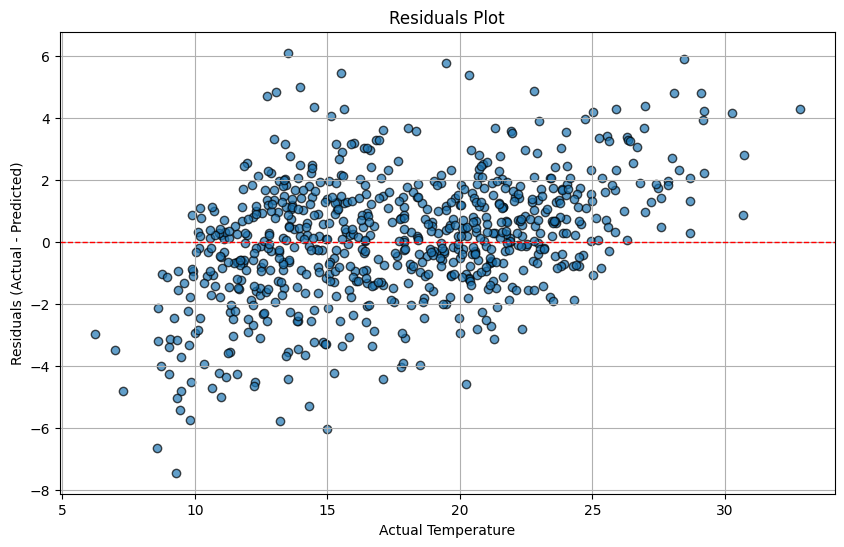

In [306]:
residuals = y_test - y_pred 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Line at zero
plt.xlabel('Actual Temperature')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

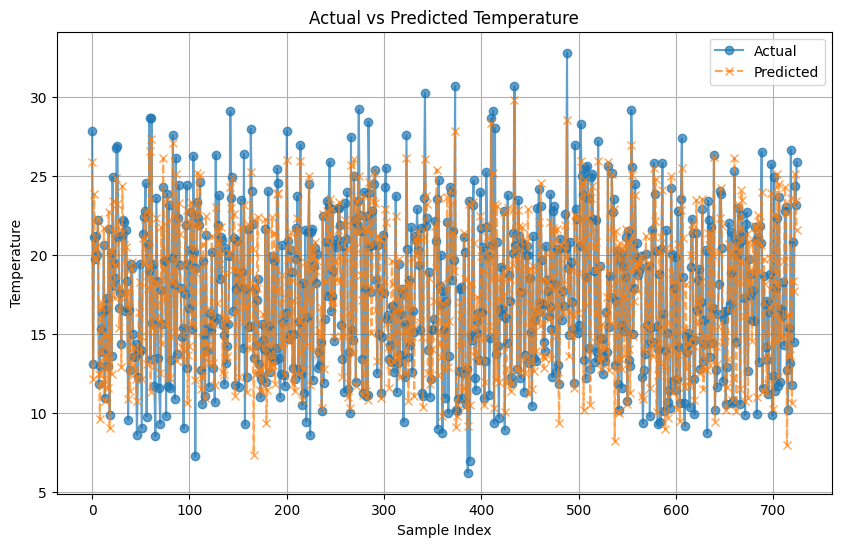

In [311]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()


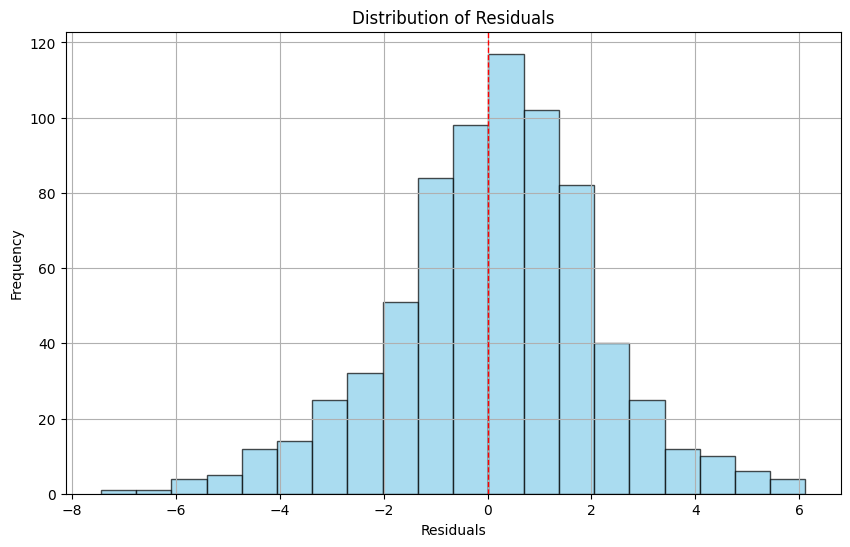

In [312]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

In [286]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(r2)
print(mae)

3.978918527160333
0.8398090810003114
1.5299777929421468


In [287]:
mse_scores = cross_val_score(regr, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores


r2_scores = cross_val_score(regr, x, y, cv=5, scoring='r2')

mae_scores = cross_val_score(regr, x, y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores

print("MSE for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))

print("R² for each fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))
print("Standard Deviation of R²:", np.std(r2_scores))

print("MAE for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
print("Standard Deviation of MAE:", np.std(mae_scores))

MSE for each fold: [4.17392835 4.41064318 3.65815583 4.30903935 3.972316  ]
Mean MSE: 4.104816542199883
Standard Deviation of MSE: 0.26723604431471754
R² for each fold: [0.85968331 0.83909219 0.82180201 0.80299291 0.79398544]
Mean R²: 0.8235111742881036
Standard Deviation of R²: 0.02386160538713418
MAE for each fold: [1.59552637 1.63622674 1.49522913 1.56588118 1.52661506]
Mean MAE: 1.563895693818911
Standard Deviation of MAE: 0.04968131477226632


In [288]:
train_features = ['jour', 'mois','precipitation', 'humidite', 'temp_moyenne_mobile', 'hum_moyenne_mobile']

input_data = {
    'jour': 30,
    'mois': 1,
    'precipitation': 0.0,
    'humidite': 80,
    'temp_moyenne_mobile': 25.310778,
    'hum_moyenne_mobile': 88.760068,
}
input_df = pd.DataFrame([input_data])
input_df_scaled=stand_scaler.transform(input_df[['precipitation', 'humidite', 'temp_moyenne_mobile', 'hum_moyenne_mobile']])
input_df_scaled= pd.DataFrame(input_df_scaled,columns=['precipitation', 'humidite', 'temp_moyenne_mobile', 'hum_moyenne_mobile'],index=input_df.index)
input_df_scaled = pd.concat([input_df[['jour','mois']].reset_index(drop=True), input_df_scaled.reset_index(drop=True)], axis=1)

predicted_temperature = regr.predict(input_df_scaled)
print(f"Predicted Temperature: {predicted_temperature[0]:.2f}")


Predicted Temperature: 27.33


In [289]:
input_df_scaled

,jour,mois,precipitation,humidite,temp_moyenne_mobile,hum_moyenne_mobile
0,30,1,-0.313712,0.476284,1.76415,2.346764


### Random Forest:

In [290]:
x1 = df.drop(['temperature','date'],axis=1,inplace=False)
y1 = df['temperature'].copy()

In [291]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [300]:
x1_train.columns

Index(['precipitation', 'humidite', 'jour', 'mois', 'temp_moyenne_mobile',
       'hum_moyenne_mobile'],
      dtype='object')

In [292]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42,min_samples_leaf=1,min_samples_split=3,max_depth=None)
rf_model.fit(x1_train, y1_train)

RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42)

In [293]:
y1_pred = rf_model.predict(x1_test)

In [294]:
y1_pred

array([24.821813  , 12.28670077, 21.8657485 , 19.72776591, 20.62127198,
       20.19065095, 23.52782846, 12.30960496, 11.16257985, 17.60902519,
       16.10223695, 12.16836282, 20.43531625, 11.09603064, 15.02363111,
       15.08365638, 11.85604016, 22.57884553, 11.63011156, 20.88798159,
       13.02568899, 23.91473578, 19.18602622, 17.2807491 , 20.47541313,
       27.68935391, 25.92679156, 22.39199884, 16.11484064, 19.08863479,
       13.94461219, 22.60399493, 21.79012439, 20.97999488, 15.64069975,
       21.62620642, 17.31820336, 10.0197995 , 17.73310239, 12.41010058,
       18.92522452, 19.26813557, 13.690922  , 14.72735001, 12.25113964,
       12.6252911 ,  9.51216342, 13.55651182, 16.30469831, 19.27383463,
       13.87019197, 11.01504774, 21.15798763, 20.76326496, 21.00023861,
       25.18394184, 11.78382864, 19.47365704, 19.47031002, 29.37139037,
       12.77841533, 26.79165169, 15.62609197, 19.47909253, 13.19717319,
       13.77446199, 22.33087777, 17.29807706, 16.48840772, 15.61

In [295]:
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)

print("MSE:", mse)
print("R²:", r2)
print("MAE:", mae)

MSE: 2.0295484919571756
R²: 0.918290551600442
MAE: 1.0885285960755287


In [296]:
mse_scores = cross_val_score(rf_model, x1, y1, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores


r2_scores = cross_val_score(rf_model, x1, y1, cv=5, scoring='r2')

mae_scores = cross_val_score(rf_model, x1, y1, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores

print("MSE for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))

print("R² for each fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))
print("Standard Deviation of R²:", np.std(r2_scores))

print("MAE for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
print("Standard Deviation of MAE:", np.std(mae_scores))


MSE for each fold: [3.80665315 3.90544982 3.6591417  3.4095305  4.03265248]
Mean MSE: 3.7626855288604446
Standard Deviation of MSE: 0.21477278663487237
R² for each fold: [0.87203016 0.85752251 0.82175399 0.844118   0.79085624]
Mean R²: 0.8372561781883725
Standard Deviation of R²: 0.028496704234949807
MAE for each fold: [1.52104285 1.51952608 1.49890924 1.46185982 1.56752207]
Mean MAE: 1.5137720106500305
Standard Deviation of MAE: 0.03432439738553561


In [297]:
feature_importance = rf_model.feature_importances_
for name, importance in zip(x1.columns, feature_importance):
    print(f"{name}: {importance:.4f}")

precipitation: 0.0128
humidite: 0.1266
jour: 0.0231
mois: 0.0644
temp_moyenne_mobile: 0.7347
hum_moyenne_mobile: 0.0384


In [301]:
train_features = ['precipitation', 'humidite','jour', 'mois', 'temp_moyenne_mobile', 'hum_moyenne_mobile']

input_data = {
    'jour': 30,
    'mois': 1,
    'precipitation': 0.0,
    'humidite': 80,
    'temp_moyenne_mobile': 25.310778,
    'hum_moyenne_mobile': 88.760068,
}
input_df = pd.DataFrame([input_data])
input_df = input_df[train_features]
predicted_temperature = rf_model.predict(input_df)
print(f"Predicted Temperature: {predicted_temperature[0]:.2f}")

Predicted Temperature: 22.35
